In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the cleaned data from Step 1
data = pd.read_csv('data/cleaned_data.csv')
  # Replace with your actual file name



In [5]:
# Identify categorical columns (except 'INJURY')
categorical_columns = data.select_dtypes(include='object').columns.tolist()
if 'INJURY' in categorical_columns:
    categorical_columns.remove('INJURY')

# One-Hot Encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Convert 'INJURY' to numeric for correlation
data_encoded['INJURY_NUM'] = data_encoded['INJURY'].astype('category').cat.codes


In [6]:
data_encoded

,INJURY,ROAD_CLASS_Expressway,ROAD_CLASS_Expressway Ramp,ROAD_CLASS_Laneway,ROAD_CLASS_Local,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Shoreline,ROAD_CLASS_Minor Arterial,ROAD_CLASS_Other,...,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D55,DIVISION_NSA,INJURY_NUM
0,Major,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
1,Minor,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,3
2,Minor,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,3
3,Minor,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,3
4,Minor,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18952,Major,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
18953,Fatal,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0
18954,Major,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
18955,Major,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1


In [7]:
# 🔔 Fix boolean True/False to 1/0
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

In [8]:
data_encoded

,INJURY,ROAD_CLASS_Expressway,ROAD_CLASS_Expressway Ramp,ROAD_CLASS_Laneway,ROAD_CLASS_Local,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Shoreline,ROAD_CLASS_Minor Arterial,ROAD_CLASS_Other,...,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D55,DIVISION_NSA,INJURY_NUM
0,Major,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,Minor,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,Minor,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
3,Minor,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,Minor,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18952,Major,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18953,Fatal,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18954,Major,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
18955,Major,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [10]:
# Remove the original string 'INJURY' column before correlation
data_encoded = data_encoded.drop(columns=['INJURY'])


In [11]:
# Step 6: Compute correlation matrix
corr_matrix = data_encoded.corr()

# Step 7: Check the correlation of all features with the target
target_corr = corr_matrix['INJURY_NUM'].sort_values(ascending=False)
print("\n✅ Correlation of features with INJURY_NUM:\n")
print(target_corr)


✅ Correlation of features with INJURY_NUM:

INJURY_NUM                         1.000000
INVTYPE_Passenger                  0.231736
ACCLASS_Non-Fatal Injury           0.193016
IMPACTYPE_Approaching              0.135588
IMPACTYPE_Rear End                 0.096971
                                     ...   
INVTYPE_Vehicle Owner             -0.080869
IMPACTYPE_Cyclist Collisions      -0.081133
INVAGE_unknown                    -0.085311
INVTYPE_Pedestrian                -0.177065
IMPACTYPE_Pedestrian Collisions   -0.203262
Name: INJURY_NUM, Length: 191, dtype: float64


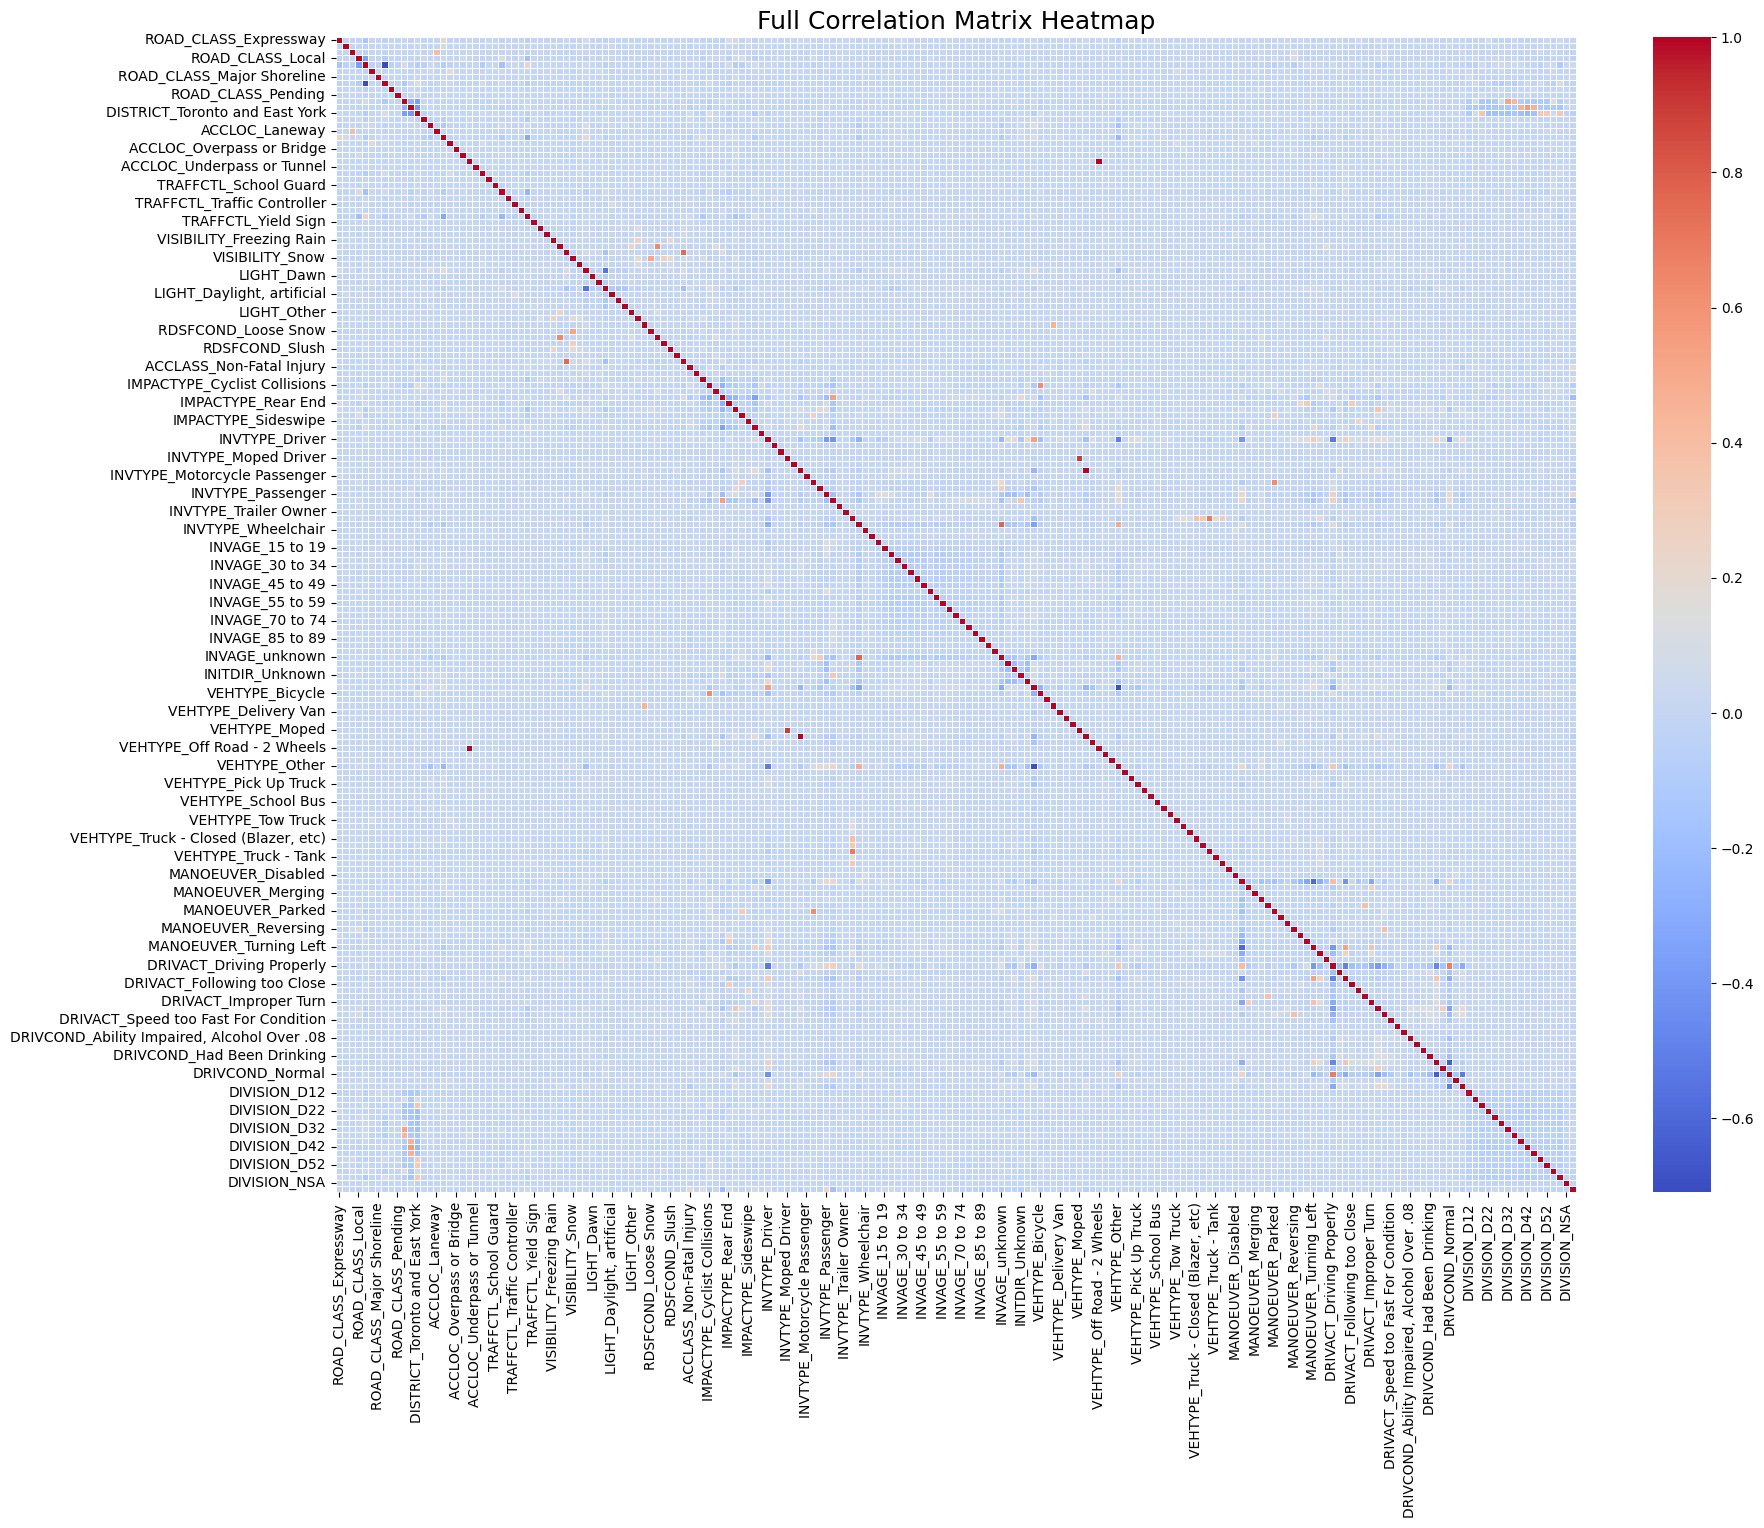

In [12]:
# Step 8: Get top 20 most correlated features with the target
top_corr_features = target_corr[1:21].index.tolist()

# Optional: Full correlation heatmap (can be very large)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Full Correlation Matrix Heatmap", fontsize=18)
plt.show()


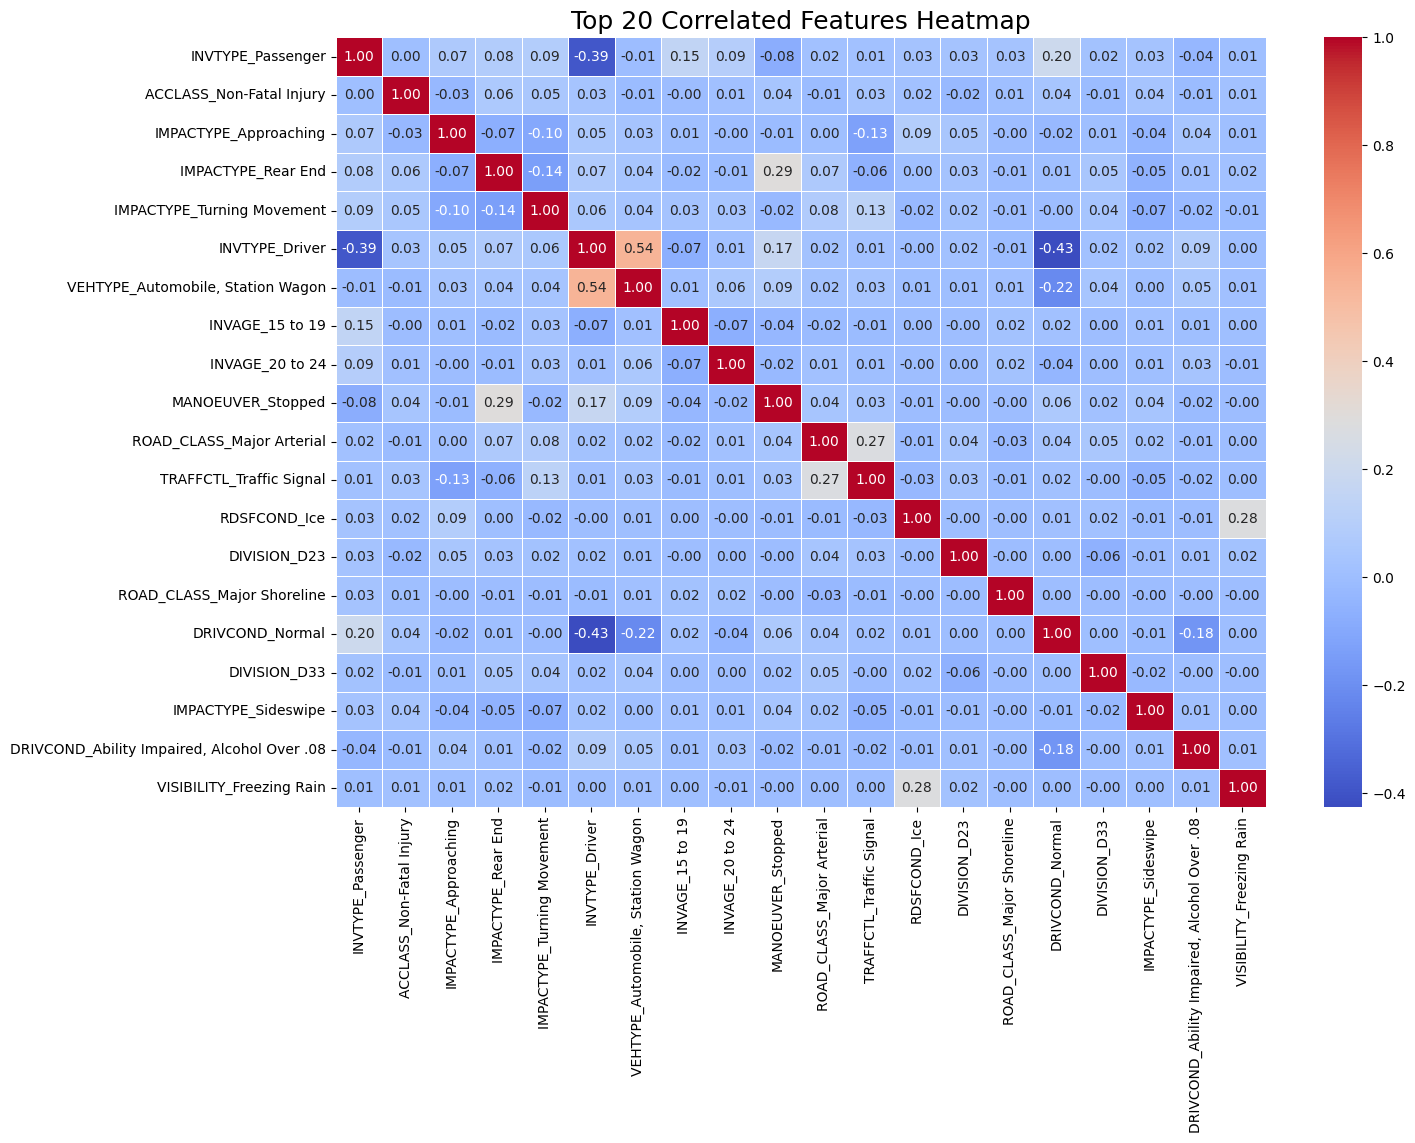

In [13]:
# Focused heatmap for top correlated features
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top 20 Correlated Features Heatmap", fontsize=18)
plt.show()

In [17]:
# Save cleaned data (without encoding)
data_encoded.to_csv('data/encoded_data.csv', index=False)

,ROAD_CLASS_Expressway,ROAD_CLASS_Expressway Ramp,ROAD_CLASS_Laneway,ROAD_CLASS_Local,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Arterial,ROAD_CLASS_Major Shoreline,ROAD_CLASS_Minor Arterial,ROAD_CLASS_Other,ROAD_CLASS_Pending,...,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D55,DIVISION_NSA,INJURY_NUM
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18952,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18953,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18954,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18955,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
